In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [3]:

heart_data=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [4]:
feature_names=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','Diabetes','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','AnyHealthcare','NoDocbcCost','Education','Income']

In [5]:
X = heart_data.drop(columns=['HeartDiseaseorAttack'])


In [6]:
Y = heart_data['HeartDiseaseorAttack']

In [7]:
heart_data=pd.DataFrame(X, columns=feature_names)

In [8]:
heart_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,AnyHealthcare,NoDocbcCost,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,5,18,15,1,0,9,1,0,4,3
1,0,0,0,25,1,0,0,1,0,0,...,3,0,0,0,0,7,0,1,6,1
2,1,1,1,28,0,0,0,0,1,0,...,5,30,30,1,0,9,1,1,4,8
3,1,0,1,27,0,0,0,1,1,1,...,2,0,0,0,0,11,1,0,3,6
4,1,1,1,24,0,0,0,1,1,1,...,2,3,0,0,0,11,1,0,5,4


In [9]:
for i in feature_names:
    print(i)


HighBP
HighChol
CholCheck
BMI
Smoker
Stroke
Diabetes
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
AnyHealthcare
NoDocbcCost
Education
Income


In [53]:
heart_data[i]=heart_data[i] / heart_data[i].std()
import warnings
warnings.filterwarnings('ignore')

In [54]:
heart_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,AnyHealthcare,NoDocbcCost,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,5,18,15,1,0,9,1,0,4,1.448472
1,0,0,0,25,1,0,0,1,0,0,...,3,0,0,0,0,7,0,1,6,0.482824
2,1,1,1,28,0,0,0,0,1,0,...,5,30,30,1,0,9,1,1,4,3.862593
3,1,0,1,27,0,0,0,1,1,1,...,2,0,0,0,0,11,1,0,3,2.896945
4,1,1,1,24,0,0,0,1,1,1,...,2,3,0,0,0,11,1,0,5,1.931296


In [55]:
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [56]:
model=LogisticRegression()

In [57]:
model.fit(X_train,Y_train)

LogisticRegression()

In [58]:
w1, w2 ,w3 ,w4 ,w5 ,w6 ,w7 , w8 , w9 , w10, w11 , w12 , w13 ,w14 ,w15 ,w16 ,w17 ,w18 ,w19 ,w20 ,w21 =model.coef_[0]

In [59]:
w0=model.intercept_[0]

In [60]:
idx=99
x=heart_data.iloc[idx][feature_names].values.reshape(1,-1)
y=model.predict_proba(x)[0][1]
print("predictions:",y)


predictions: 0.04568927128351081


In [61]:
z= w0 + w1*heart_data.iloc[idx][feature_names[0]]+w2*heart_data.iloc[idx][feature_names[1]]+w3*heart_data.iloc[idx][feature_names[2]]+w4*heart_data.iloc[idx][feature_names[3]]+w5*heart_data.iloc[idx][feature_names[4]]+w6*heart_data.iloc[idx][feature_names[5]]+w7*heart_data.iloc[idx][feature_names[6]]+w8*heart_data.iloc[idx][feature_names[7]]+w9*heart_data.iloc[idx][feature_names[8]]+w10*heart_data.iloc[idx][feature_names[9]]+w11*heart_data.iloc[idx][feature_names[10]]+w12*heart_data.iloc[idx][feature_names[11]]+w13*heart_data.iloc[idx][feature_names[12]]+w14*heart_data.iloc[idx][feature_names[13]]+w15*heart_data.iloc[idx][feature_names[14]]+w16*heart_data.iloc[idx][feature_names[15]]+w17*heart_data.iloc[idx][feature_names[16]]+w18*heart_data.iloc[idx][feature_names[17]]+w19*heart_data.iloc[idx][feature_names[18]]+w20*heart_data.iloc[idx][feature_names[19]]+w21*heart_data.iloc[idx][feature_names[20]]

In [62]:
def sigmoid(z):
    import math
    return 1/ (1+ pow(math.e , -z))

In [63]:
sigmoid(z)

0.04568927128351078

In [64]:
w=[w1, w2 ,w3 ,w4 ,w5 ,w6 ,w7 , w8 , w9 , w10, w11 , w12 , w13 ,w14 ,w15 ,w16 ,w17 ,w18 ,w19 ,w20 ,w21]

In [65]:
feature_importance=pd.DataFrame(feature_names, columns=['FEATURES'])

In [66]:
 import math
feature_importance['importance']=pow(math.e, np.array(w))

In [67]:
feature_importance.sort_values(by =['importance'], ascending= False)

,FEATURES,importance
5,Stroke,3.212457
17,AnyHealthcare,2.036785
1,HighChol,1.956020
0,HighBP,1.782731
13,PhysHlth,1.531291
4,Smoker,1.477653
16,Age,1.335697
18,NoDocbcCost,1.258245
6,Diabetes,1.177006
15,Sex,1.002662


<Axes: xlabel='FEATURES'>

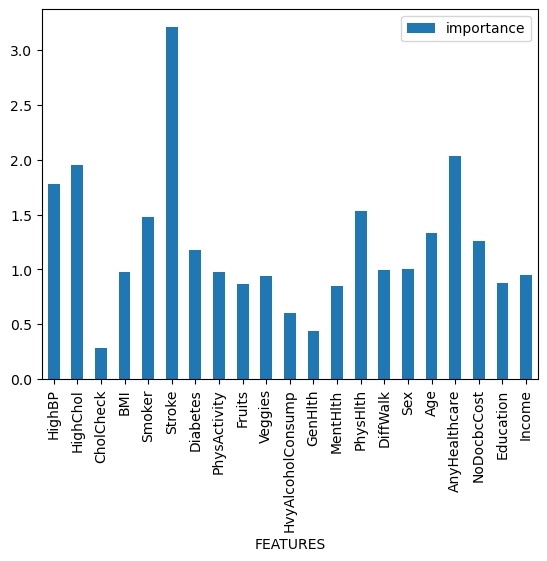

In [68]:
feature_importance.plot(x ='FEATURES', y ='importance', kind='bar')

In [69]:
predictions=model.predict(X_test)

In [70]:
Accuracy = accuracy_score(Y_test,predictions)

In [71]:
print(Accuracy)

0.9058262377798801


In [72]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     45964
           1       0.50      0.13      0.21      4772

    accuracy                           0.91     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



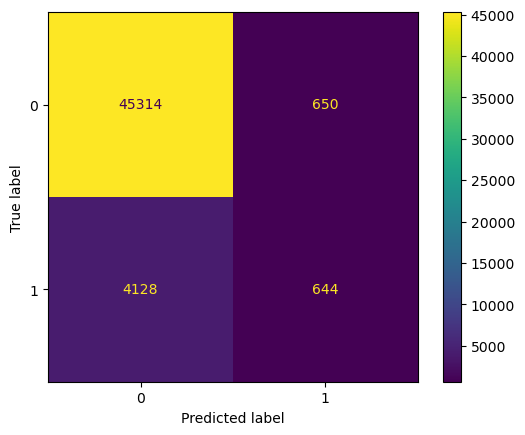

In [73]:
cm = confusion_matrix(Y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [52]:
cm=confusion_matrix(Y_test,predictions)